For n_clusters = 2, the silhouette score is 0.3247
For n_clusters = 3, the silhouette score is 0.1941
For n_clusters = 4, the silhouette score is 0.2553
For n_clusters = 5, the silhouette score is 0.2596
For n_clusters = 6, the silhouette score is 0.3130
For n_clusters = 7, the silhouette score is 0.3333
For n_clusters = 8, the silhouette score is 0.3311
For n_clusters = 9, the silhouette score is 0.3412
For n_clusters = 10, the silhouette score is 0.3426
Overall Silhouette Score (KMeans): 0.3425703604479961

Cluster Centers:
           N           P           K  temperature   humidity        ph  \
0  26.934509   58.030227   21.501259    28.178598  69.298937  7.120876   
1  98.483965   56.005831   30.288630    24.743339  73.457941  6.430129   
2  99.870000   17.360000   50.150000    27.127416  88.751589  6.427292   
3  21.990000  133.375000  200.000000    23.240259  87.104305  5.977800   
4  20.439716   67.893617   22.212766    20.189262  28.562467  5.726021   
5  18.659091   17.477273

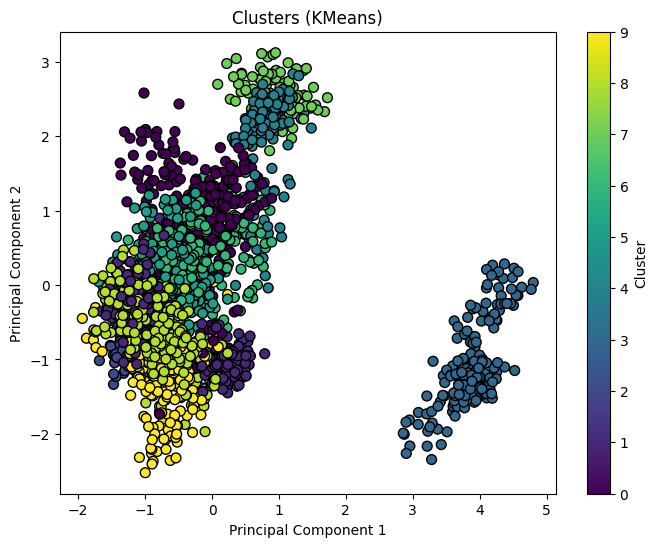

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# Data preprocessing
X = data.drop('label', axis=1)

# Standard scaling for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of cluster numbers to evaluate
cluster_range = range(2, 11)
silhouette_scores_kmeans = []

# Compute silhouette score for each cluster number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores_kmeans.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.4f}")

# Choose the number of clusters with the highest silhouette score
chosen_clusters = cluster_range[np.argmax(silhouette_scores_kmeans)]

# Perform KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_clusters, random_state=42)
kmeans.fit(X_scaled)

# Evaluate clustering performance using silhouette score for the entire model
silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans.labels_)
print("Overall Silhouette Score (KMeans):", silhouette_avg_kmeans)

# Display the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("\nCluster Centers:")
print(cluster_centers_df)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters (KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
